In [1]:
pip install jieba

  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314481 sha256=c976a953ba58e2b17b3b08b46946d1149aff22ac777e21e70216d0a9a7d403cf
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\24\aa\17\5bc7c72e9a37990a9620cc3aad0acad1564dcff6dbc2359de3
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [1]:
import jieba
import jieba.analyse
import re
import pandas as pd
import matplotlib.pyplot as plt

權重排名:
   word    TF-IDF
0    什麼  0.194645
1    八卦  0.194205
2    台灣  0.120814
3    怎麼  0.111867
4    肥宅  0.073366
..  ...       ...
95   不過  0.007350
96   一直  0.007303
97   ..  0.007249
98  ptt  0.007110
99   最強  0.006979

[100 rows x 2 columns]


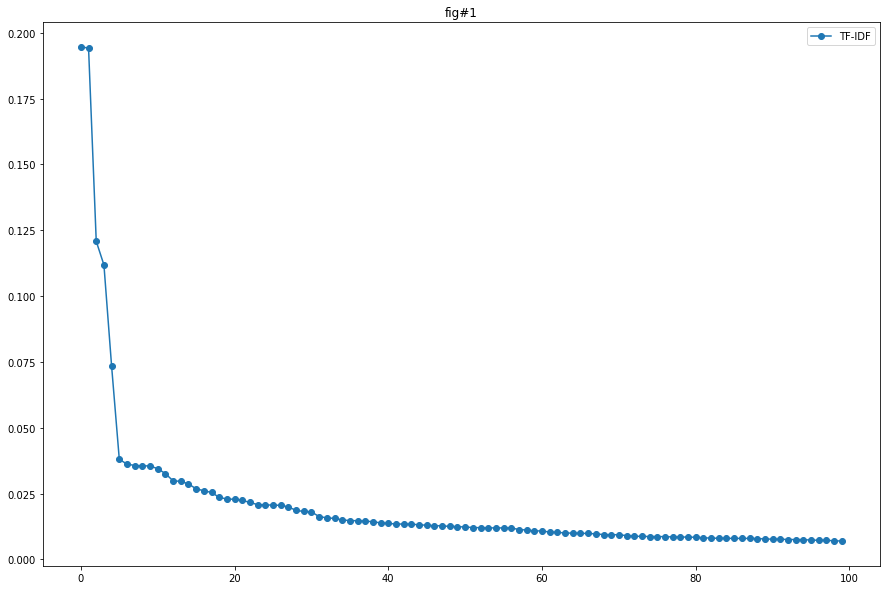

In [24]:
def TF_IDF():
    op = open("hw1.txt", encoding="utf-8").read()
    tags = jieba.analyse.extract_tags(op, topK=100, withWeight=True)
    df = pd.DataFrame(tags, columns = ["word", "TF-IDF"]) 
    print('權重排名:')
    print(df)
    chart = df.plot( kind ='line',
                    title = 'fig#1',
                    marker = 'o',
                    figsize = (15,10))
    plt.show()
TF_IDF()

出現頻率排名
   word  Frequncy
0    八卦     79063
1    什麼     57731
2    怎麼     33349
3    台灣     32444
4    可以     23236
..  ...       ...
95   好像      2716
96   而已      2674
97   結果      2660
98   一次      2654
99   大學      2647

[100 rows x 2 columns]


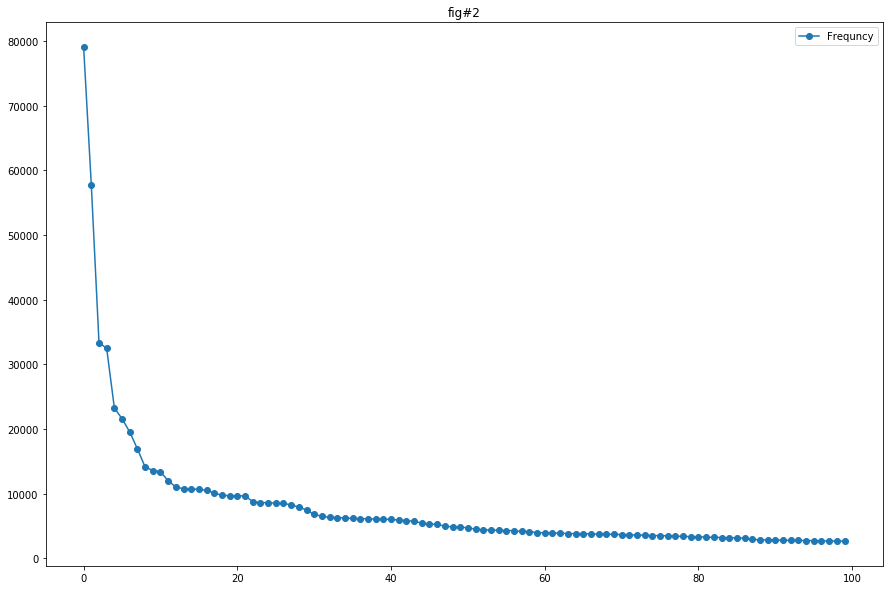

In [23]:
def Frequency():
    Word=""
    op = open("hw1.txt", encoding="utf-8").read()
    ch =re.compile("[\u4e00-\u9fa5]")
    word =  "".join(ch.findall(op))
    cut = jieba.lcut(word)

    counts = {}
    for i in cut :
        if(len(i)>1):
            counts[i] = counts.get(i,0) + 1

    items = list(counts.items())  
    items.sort(key=lambda x:x[1], reverse=True)

    for i in range(100):  
        word, count = items[i]  
    
    df = pd.DataFrame(items, columns = ["word", "Frequncy"]).sort_values(['Frequncy'],ascending=[False])[0:100]
    print('出現頻率排名')
    print(df)
    chart = df.plot( kind ='line',
                    title = 'fig#2',
                    marker = 'o',
                    figsize = (15,10))
    plt.show()

Frequency()